In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\MMC 2025 Problem C\\final_medal_counts_with_sports.csv")

In [48]:


filtered_df = df[df["Year"].isin([2020, 2024])]

events_total = filtered_df[["Year", "Events", "Total"]]

# In kết quả
print(events_total)

      Year  Events  Total
1141  2020     245    113
1142  2020     210     89
1143  2020     222     58
1144  2020     197     64
1145  2020     193     46
...    ...     ...    ...
1288  2024      11      1
1289  2024      21      1
1290  2024      10      1
1291  2024      24      1
1292  2024      31      1

[152 rows x 3 columns]


In [49]:

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomial

df = df[df["Year"].isin([2020, 2024])]


X = sm.add_constant(df[["Events"]])  
y = df["Total"]


nb_model = NegativeBinomial(y, X).fit()
print(nb_model.summary())

Optimization terminated successfully.
         Current function value: 2.693521
         Iterations: 11
         Function evaluations: 20
         Gradient evaluations: 20
                     NegativeBinomial Regression Results                      
Dep. Variable:                  Total   No. Observations:                  152
Model:               NegativeBinomial   Df Residuals:                      150
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Jan 2025   Pseudo R-squ.:                  0.2488
Time:                        16:40:21   Log-Likelihood:                -409.42
converged:                       True   LL-Null:                       -545.04
Covariance Type:            nonrobust   LLR p-value:                 6.063e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8722      0.072     1

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

metadata_columns = ["Rank", "NOC_CODE", "Gold", "Silver", "Bronze", "Total", "Year", "Host", "Events"]

sports_columns = df.columns.drop(metadata_columns).tolist()

# Hàm tính entropy
def calculate_entropy(row):
    medals = row[sports_columns].values.astype(float)
    medals = medals[medals > 0]  
    if len(medals) == 0:
        return 0.0  
    prob = medals / medals.sum()
    return entropy(prob, base=2)


df['Entropy'] = df.apply(calculate_entropy, axis=1)

print(df[['Year', 'NOC_CODE', 'Total', 'Entropy']])

      Year NOC_CODE  Total   Entropy
1141  2020      USA    113  3.763295
1142  2020      CHN     89  3.946268
1143  2020      JPN     58  3.405581
1144  2020      GBR     64  3.839745
1145  2020      AUS     46  2.985429
...    ...      ...    ...       ...
1288  2024      CIV      1  0.000000
1289  2024      PER      1  0.000000
1290  2024      QAT      1  0.000000
1291  2024      SGP      1  0.000000
1292  2024      SVK      1  0.000000

[152 rows x 4 columns]


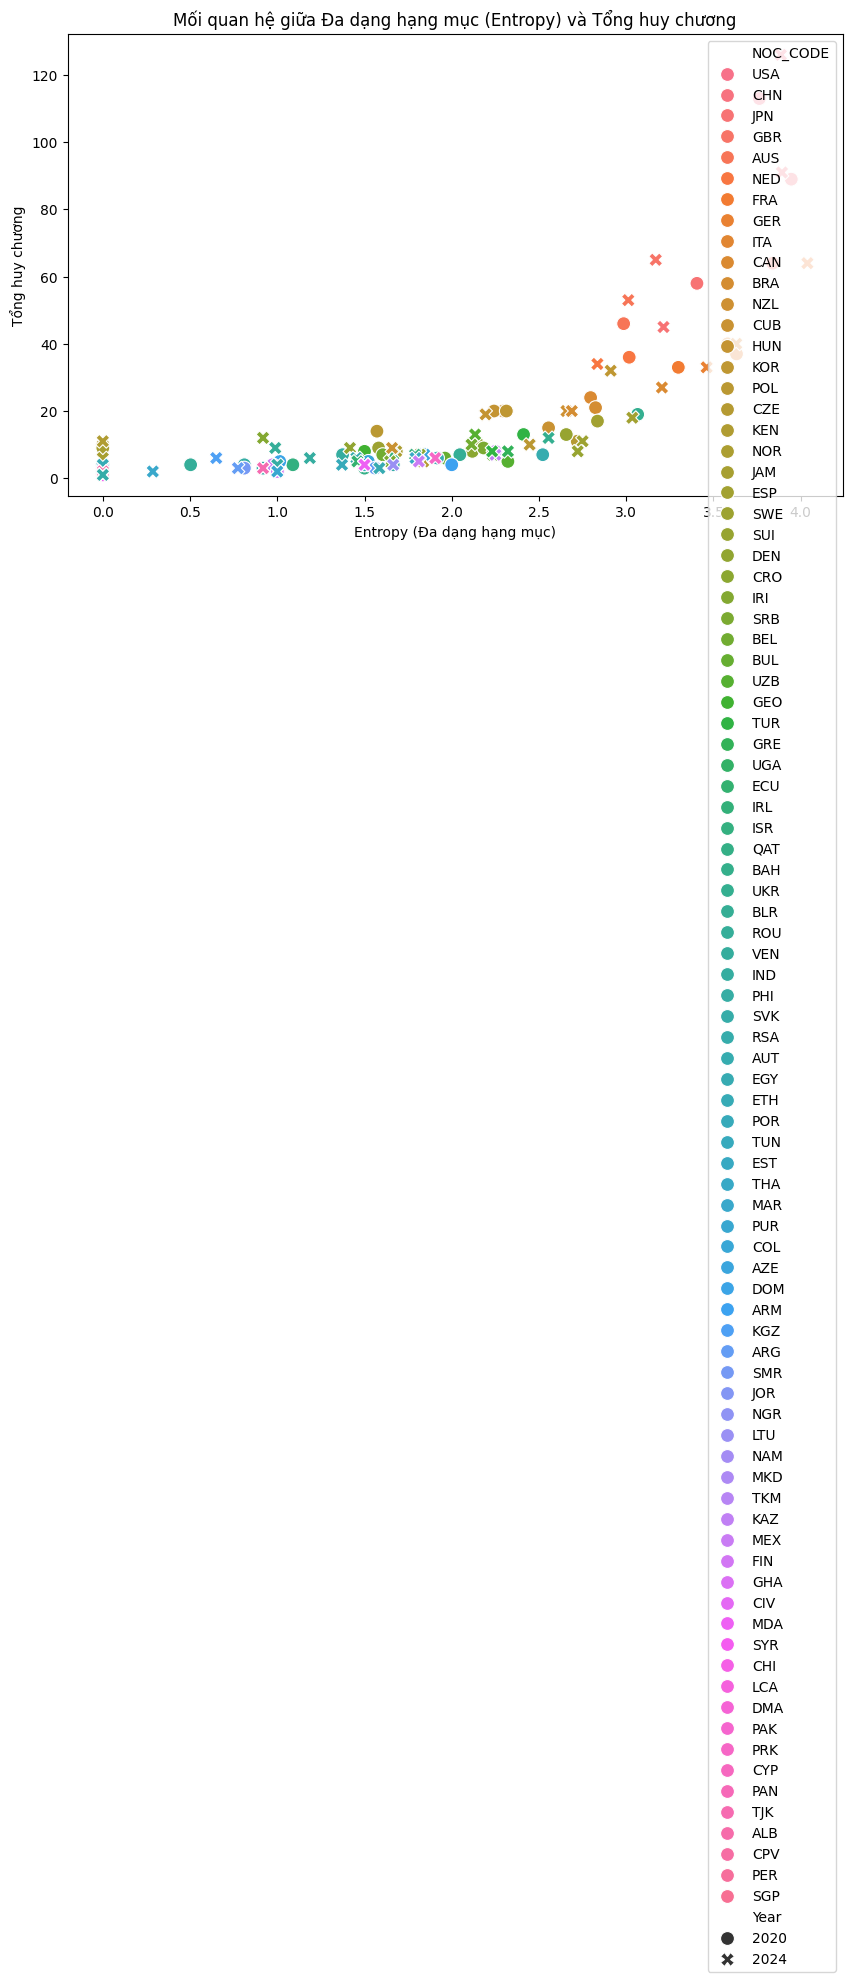

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Entropy', y='Total', hue='NOC_CODE', style='Year', s=100)
plt.title("Mối quan hệ giữa Đa dạng hạng mục (Entropy) và Tổng huy chương")
plt.xlabel("Entropy (Đa dạng hạng mục)")
plt.ylabel("Tổng huy chương")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, pearsonr

metadata_columns = ["Rank", "NOC_CODE", "Gold", "Silver", "Bronze", "Total", "Year", "Host", "Events"]
sports_columns = df.columns.drop(metadata_columns).tolist()

def calculate_entropy(row):
    medals = row[sports_columns].values.astype(float)
    medals = medals[medals > 0]
    return entropy(medals/medals.sum(), base=2) if len(medals) > 0 else 0.0

df['Entropy'] = df.apply(calculate_entropy, axis=1)


years = [2020, 2024]  
analysis_results = {}

for year in years:
    try:
        # Lọc và lấy top 5
        yearly_data = df[df['Year'] == year].sort_values('Total', ascending=False).head(5)
        
        # Tính Pearson
        corr, p_value = pearsonr(yearly_data['Total'], yearly_data['Entropy'])
        
        # Phân loại quốc gia
        avg_entropy = yearly_data['Entropy'].mean()
        countries_classification = []
        
        for _, row in yearly_data.iterrows():
            classification = "Phân bổ rộng" if row['Entropy'] >= avg_entropy else "Môn chủ lực"
            countries_classification.append({
                'NOC': row['NOC_CODE'],
                'Total': row['Total'],
                'Entropy': row['Entropy'],
                'Classification': classification
            })
        
        analysis_results[year] = {
            'correlation': corr,
            'p_value': p_value,
            'countries': countries_classification,
            'avg_entropy': avg_entropy
        }
        
    except KeyError:
        print(f"Không tìm thấy dữ liệu cho năm {year}")
        continue

for year, result in analysis_results.items():
    print(f"\nNăm {year}:")
    print(f"- Hệ số Pearson: {result['correlation']:.3f}")
    print(f"- P-value: {result['p_value']:.3f}")
    print(f"- Entropy trung bình: {result['avg_entropy']:.2f}")
    print("- Phân loại các quốc gia:")
    
    for country in result['countries']:
        print(f"  + {country['NOC']}: {country['Classification']} (Total: {country['Total']}, Entropy: {country['Entropy']:.2f})")


print("\n[Giải thích]")
for year, result in analysis_results.items():
    print(f"\nNăm {year}:")
    if result['p_value'] < 0.05:
        if result['correlation'] < 0:
            print("Có mối tương quan nghịch đáng kể - Quốc gia có tổng huy chương cao thường tập trung vào ít môn thể thao")
        else:
            print("Có mối tương quan thuận đáng kể - Quốc gia có tổng huy chương cao thường phân bổ đều")
    else:
        print("Không có mối tương quan đáng kể về mặt thống kê (p > 0.05)")


Năm 2020:
- Hệ số Pearson: 0.677
- P-value: 0.209
- Entropy trung bình: 3.66
- Phân loại các quốc gia:
  + USA: Phân bổ rộng (Total: 113, Entropy: 3.81)
  + CHN: Phân bổ rộng (Total: 89, Entropy: 4.02)
  + GBR: Phân bổ rộng (Total: 64, Entropy: 3.91)
  + JPN: Môn chủ lực (Total: 58, Entropy: 3.49)
  + AUS: Môn chủ lực (Total: 46, Entropy: 3.07)

Năm 2024:
- Hệ số Pearson: 0.559
- P-value: 0.327
- Entropy trung bình: 3.67
- Phân loại các quốc gia:
  + USA: Phân bổ rộng (Total: 126, Entropy: 3.93)
  + CHN: Phân bổ rộng (Total: 91, Entropy: 3.96)
  + GBR: Môn chủ lực (Total: 65, Entropy: 3.25)
  + FRA: Phân bổ rộng (Total: 64, Entropy: 4.10)
  + AUS: Môn chủ lực (Total: 53, Entropy: 3.10)

[Giải thích]

Năm 2020:
Không có mối tương quan đáng kể về mặt thống kê (p > 0.05)

Năm 2024:
Không có mối tương quan đáng kể về mặt thống kê (p > 0.05)
